# Tratar variáveis socioeconômicas

Script para verificar as variáveis socioeconômicas.

In [104]:
%pylab inline
import zap_util as z
z.set_style()

Populating the interactive namespace from numpy and matplotlib


## Listagem de bairros por AISP

In [11]:
# Áreas Integradas de Segurança Púlica.
aisp = z.pd.DataFrame.from_csv('./../instituto_seguranca_publica/aisp_bairro.csv', index_col=None)
aisp

,aisp,nome
0,2,Catete
1,2,Cosme Velho
2,2,Flamengo
3,2,Glória
4,2,Laranjeiras
5,2,Botafogo
6,2,Humaitá
7,2,Urca
8,3,Cachambi
9,3,Méier


In [60]:
# Agrupar pelo código do AISP.
g = aisp.groupby('aisp')
gb = g.aggregate(lambda x : ', '.join(sorted(x)))
gb['AISP'] = gb.index
gb['Bairros'] = gb.nome
del gb['nome']
gb[['AISP','Bairros']]

,AISP,Bairros
aisp,,
2,2,"Botafogo, Catete, Cosme Velho, Flamengo, Glóri..."
3,3,"Abolição, Cachambi, Del Castilho, Encantado, E..."
4,4,"Caju, Catumbi, Centro, Cidade Nova, Estácio, M..."
5,5,"Centro, Gamboa, Lapa, Paqueta, Santa Teresa, S..."
6,6,"Alto da Boa Vista, Andaraí, Grajaú, Tijuca, Vi..."
9,9,"Bento Ribeiro, Campinho, Cascadura, Cavalcanti..."
14,14,"Bangu, Campo dos Afonsos, Deodoro, Gericinó, J..."
16,16,"Brás de Pina, Complexo do Alemao, Cordovil, Ja..."
17,17,"Bancários, Cacuia, Cidade Universitária, Cocot..."


#### Salvar tabela para o documento LATEX.

In [63]:
z.pd.set_option('display.max_colwidth',-1)
with open('./../texto/img/tbl_bairros_aisp.tex','w') as f:
    s = gb.to_latex(index=False, )
    s += ''
    f.write(s.encode('utf-8'))

## Visualizações da variáveis socioeconômicas.

In [95]:
df = z.get('select * from _var_socioecon','gid')
df.describe()

,index,se_anos_estudo,se_perc_alfabetizacao,se_renda,se_saneamento,se_idh,se_crm_roubo,se_crm_violento
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,80.000000,8.352174,97.311573,1931.945528,0.912236,0.840027,1455.035931,686.739609
std,46.620811,2.154657,1.923924,1459.179621,0.143975,0.065726,887.606510,337.135620
min,0.000000,3.880000,85.330000,571.010000,0.000000,0.711408,374.149360,423.449787
25%,40.000000,6.950000,96.630000,1085.850000,0.905568,0.798364,777.602554,539.180020
50%,80.000000,7.800000,97.680000,1395.590000,0.963885,0.838543,1422.348026,577.233233
75%,120.000000,9.810000,98.510000,2103.470000,0.991115,0.877972,1740.699949,724.358959
max,160.000000,13.890000,100.000000,8286.460000,0.999774,0.970435,4871.753940,3306.226945


In [108]:
DIR = '../texto/img/'
def plot(column, legend):
    z.plot_boxhist(df[column].values, u'Variável '+column, 
        legend  )
    savefig(DIR+'var_'+column+'_boxhist.png')

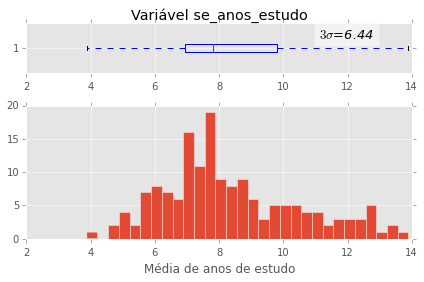

In [109]:
plot('se_anos_estudo',u'Média de anos de estudo')

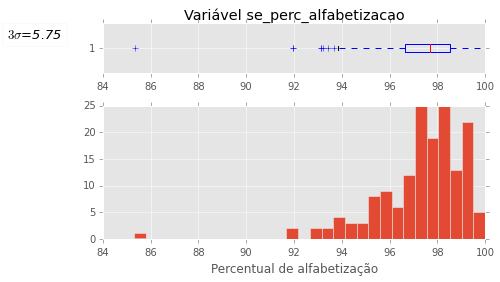

In [110]:
plot('se_perc_alfabetizacao', u'Percentual de alfabetização')

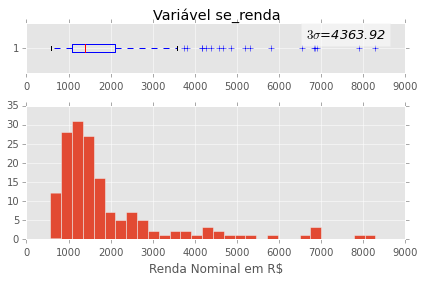

In [120]:
plot('se_renda','Renda Nominal em R\$')

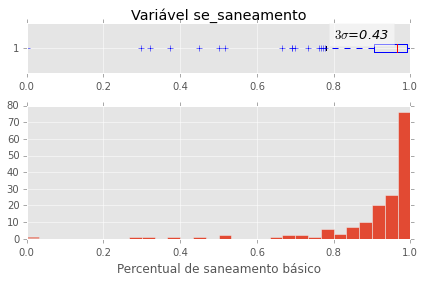

In [115]:
plot('se_saneamento', u'Percentual de saneamento básico')

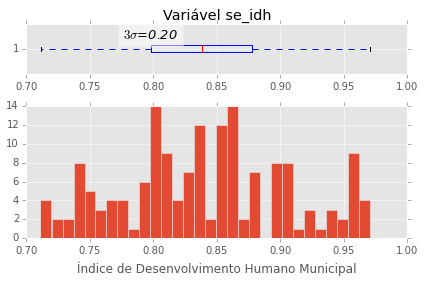

In [116]:
plot('se_idh', u'Índice de Desenvolvimento Humano Municipal')

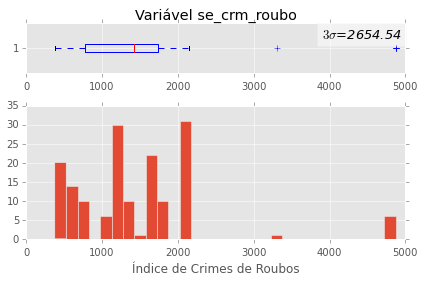

In [118]:
plot('se_crm_roubo', u'Índice de Crimes de Roubos')

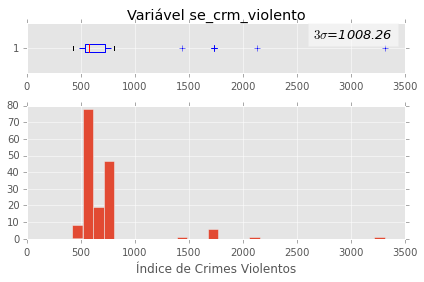

In [119]:
plot('se_crm_violento', u'Índice de Crimes Violentos')